# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score


from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices


import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.



1. What are the important attributes which a bank can target to get more term deposits and keep the campaigns cost effective.
 
 Steps:
 1. Will create different models to check the efficency of each model 
 2. For the most efficent one, I will use Feature Importance to get the list of all the features which directly impact the results
 
 Feature importance of different models like linear regression, decision trees, and support vector machines (SVMs) results can indeed vary between models.
 
 Linear Regression: Feature importance is typically derived from the coefficients of the model. Larger absolute values of coefficients indicate more important features.
 
 
 Decision Trees: Feature importance is calculated based on the reduction in impurity (e.g., Gini impurity or entropy) each feature provides. Features that result in greater impurity reduction are considered more important.
 
 
 Support Vector Machines (SVMs): For linear SVMs, feature importance can be inferred from the weights assigned to each feature. For non-linear SVMs, feature importance is less straightforward and often requires additional techniques like Recursive Feature Elimination (RFE).
 
 
 Classifiers (e.g., Random Forest, Gradient Boosting): These ensemble methods aggregate the feature importances from multiple decision trees. Features that consistently contribute to reducing impurity across many trees are deemed more important.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Unique values in column age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Unique values in column job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values in column marital: ['married' 'single' 'divorced' 'unknown']
Unique values in column education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values in column default: ['no' 'unknown' 'yes']
Unique values in column housing: ['no' 'yes' 'unknown']
Unique values in column loan: ['no' 'yes' 'unknown']
Unique values in column contact: ['telephone' 'cellular']
Unique values in column month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique value

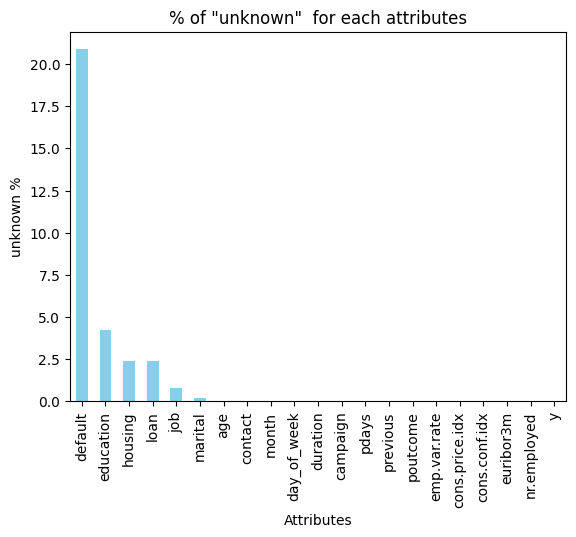

In [6]:
#print different values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column {column}: {unique_values}")

# %%
# check and Plot a graph with percentages of unknowns
unknown_values  = df.apply(lambda x: (x == 'unknown').sum())
total_counts = df.shape[0]
unknown_percentage = (unknown_values / total_counts) * 100

unknown_percentage = unknown_percentage.sort_values(ascending=False)
unknown_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Attributes')
plt.ylabel('unknown %')
plt.title('% of "unknown"  for each attributes'  )
plt.show()

In [4]:
#drop unknown rows of data where % is less than 5% this should not have big impact on our results
columns_to_check = ['education', 'housing','loan','job','marital']
bank = df[~df[columns_to_check].isin(['unknown']).any(axis=1)]
bank = bank.reset_index(drop=True)

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [8]:
 # Check for same combination client information with different y values
duplicate_combinations = df[df.duplicated(subset=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan'], keep=False)]

# Group by all columns except y and check if there are different y values for the same combination
conflicting_combinations = duplicate_combinations.groupby(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan'])['y'].nunique()
conflicting_combinations = conflicting_combinations[conflicting_combinations > 1]

# Calculate the percentage of conflicting combinations
percentage_conflicting = (len(conflicting_combinations) / len(df)) * 100

print("Conflicting combinations of attributes with different y values:")
print(conflicting_combinations)
print(f"Percentage of conflicting combinations: {percentage_conflicting:.2f}%")

# The results shows only 5% of noise , for basic modeling we can only use client attributes and see how the model performs 


Conflicting combinations of attributes with different y values:
age  job        marital   education    default  housing  loan
18   student    single    basic.4y     no       yes      no      2
                          basic.9y     no       yes      no      2
                          high.school  no       no       no      2
                          unknown      no       no       no      2
                                                yes      no      2
                                                                ..
85   housemaid  married   basic.4y     unknown  no       no      2
     retired    divorced  basic.4y     unknown  yes      no      2
                married   basic.4y     no       no       no      2
88   retired    divorced  basic.4y     no       yes      no      2
                                                         yes     2
Name: y, Length: 2085, dtype: int64
Percentage of conflicting combinations: 5.06%


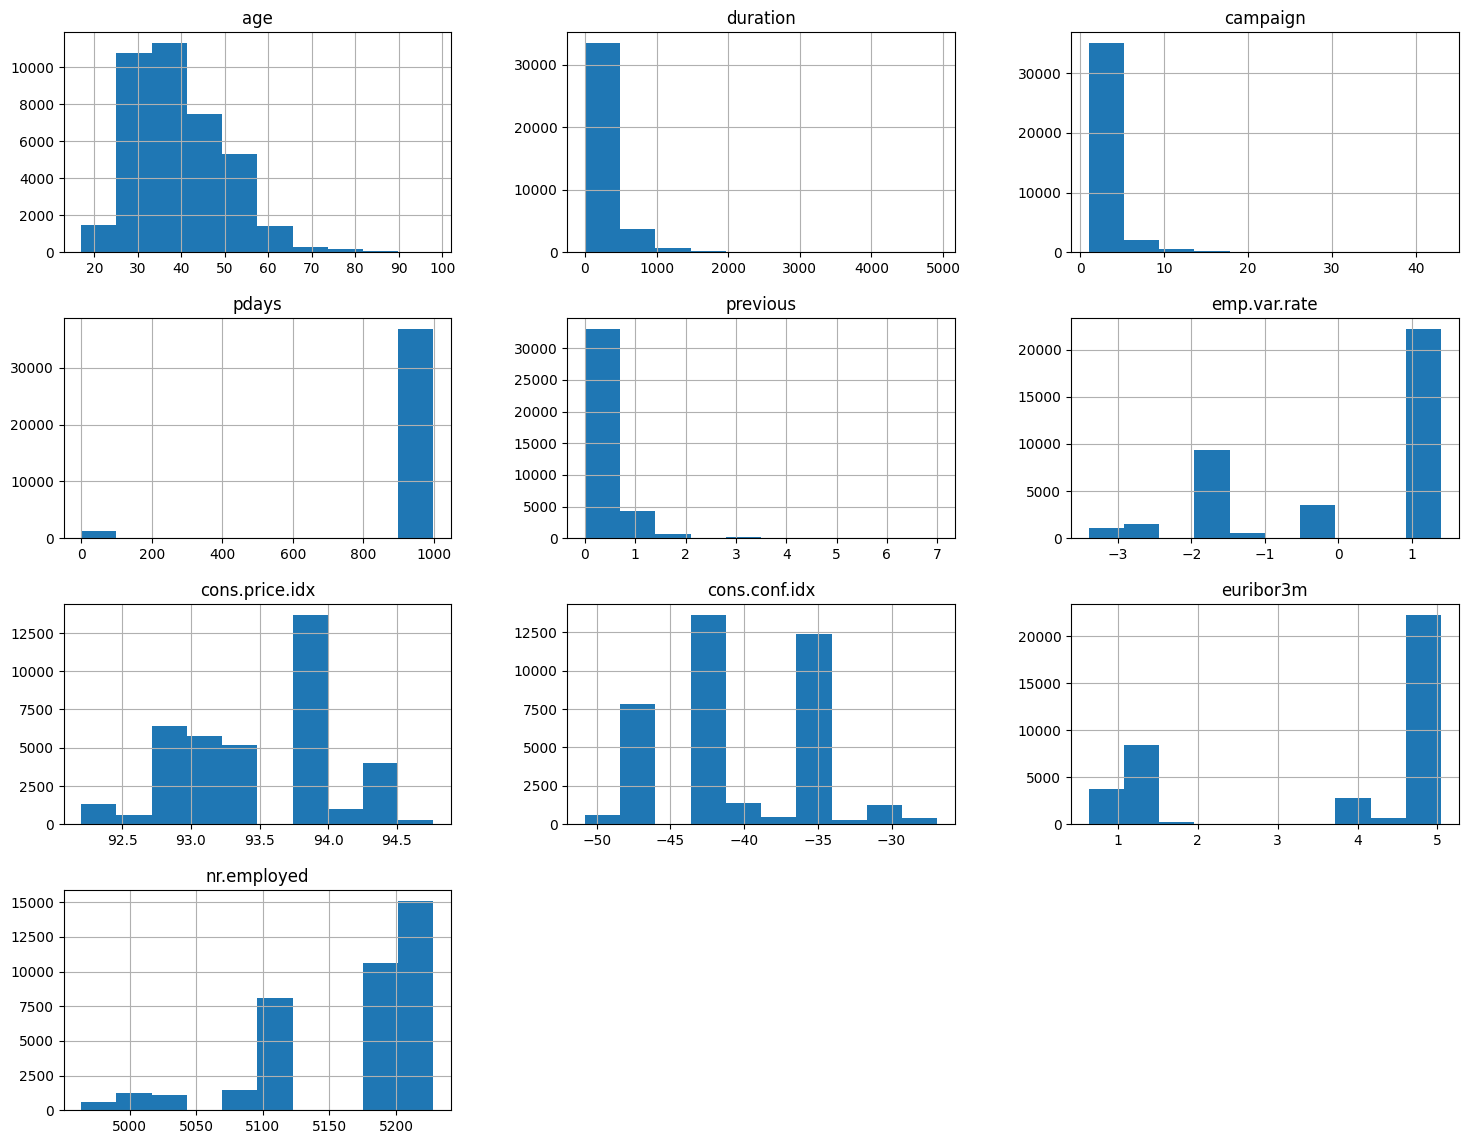

In [9]:
bank.hist(figsize = (18, 14))
plt.show()

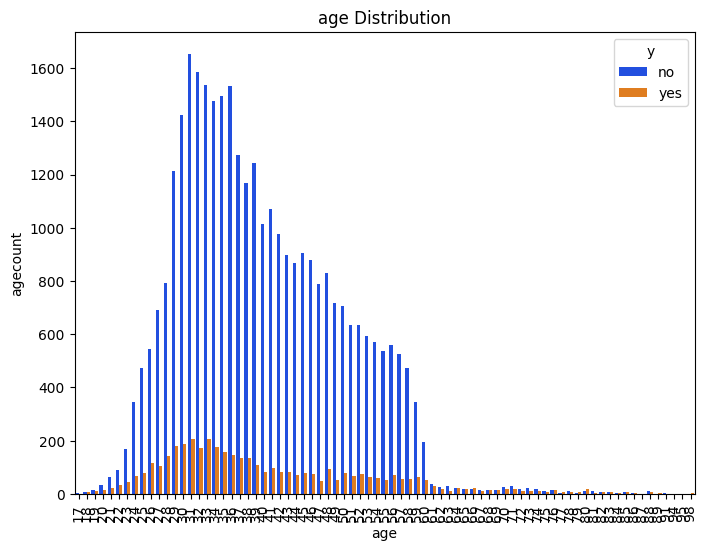

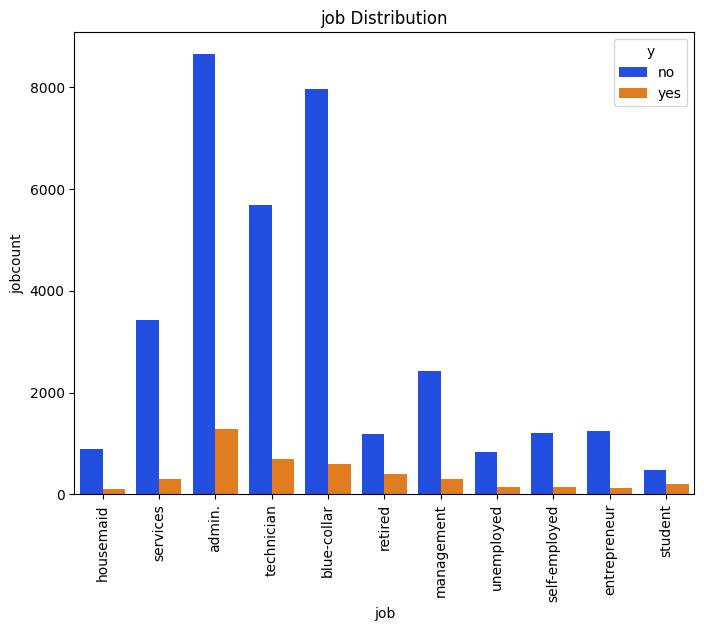

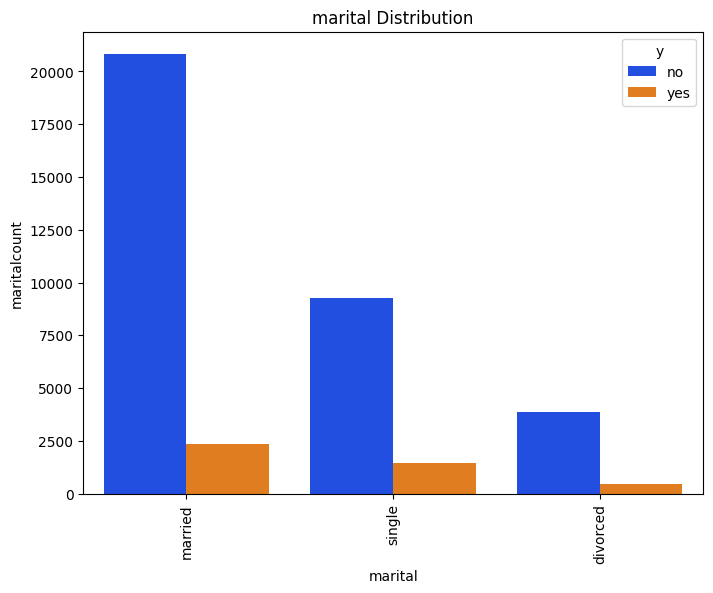

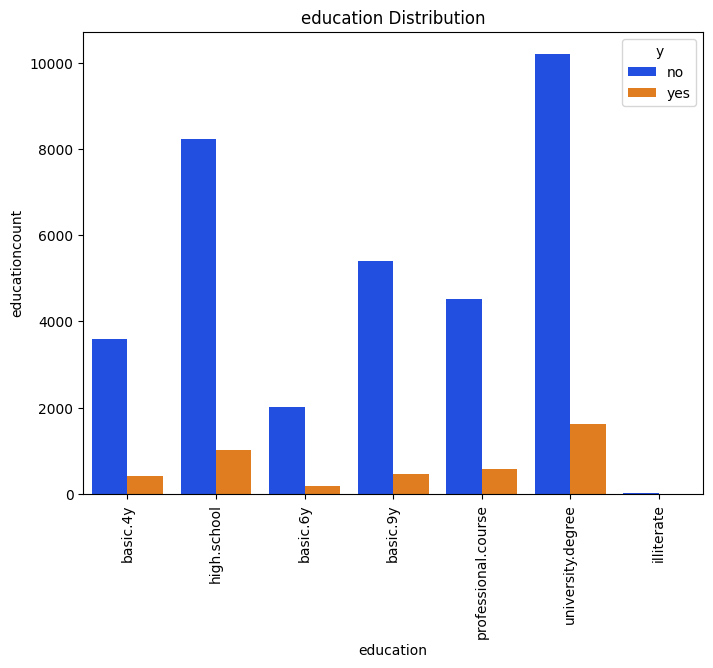

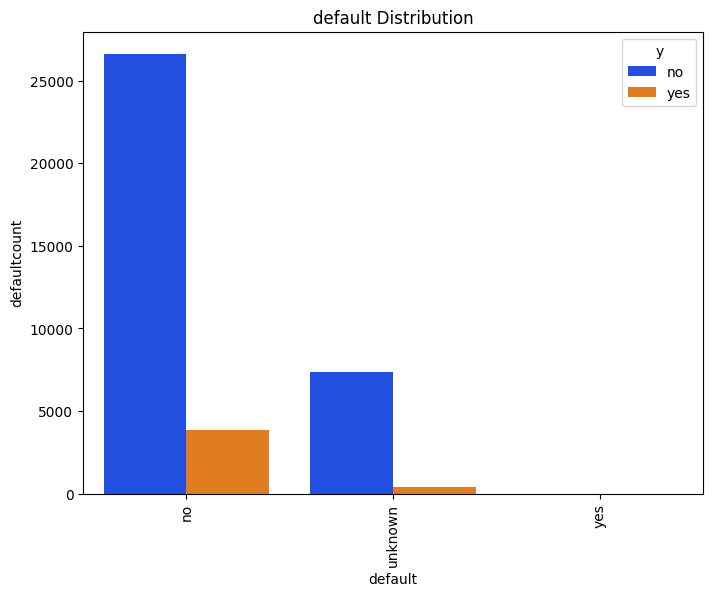

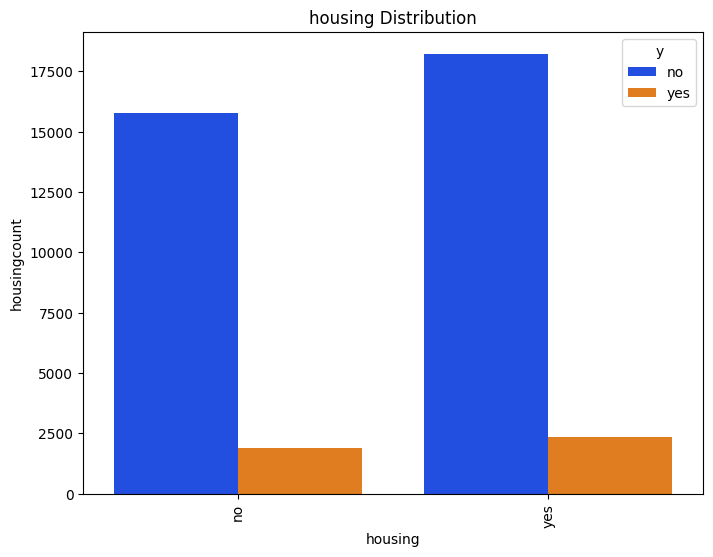

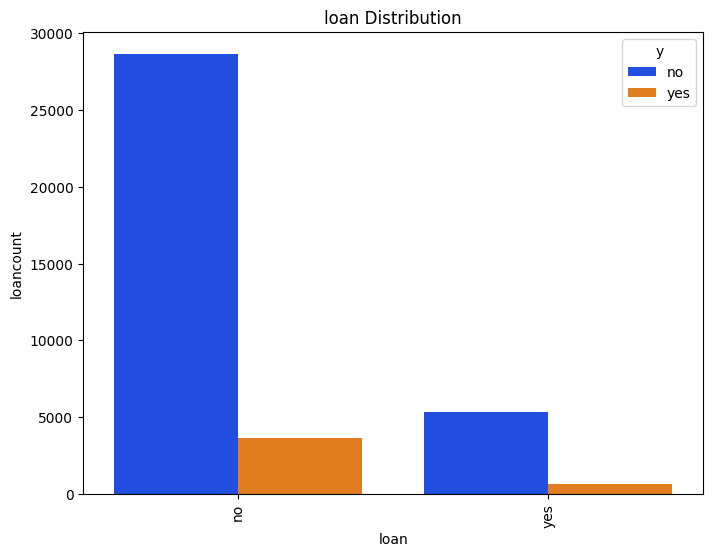

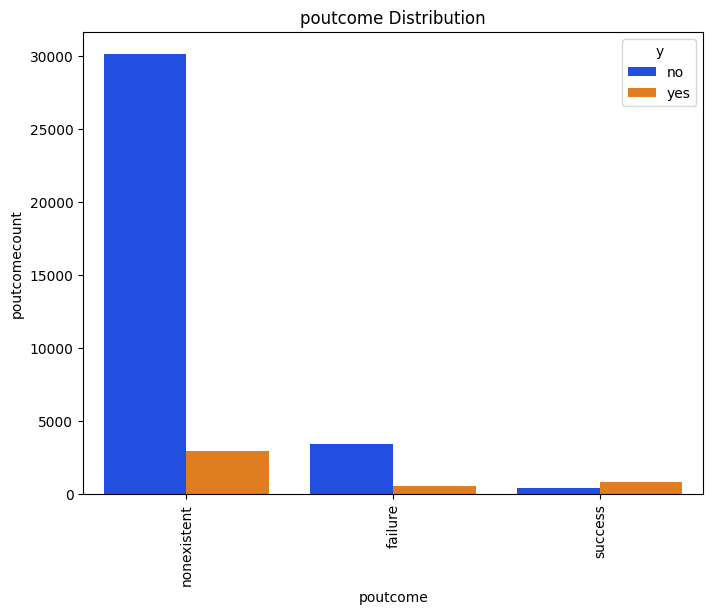

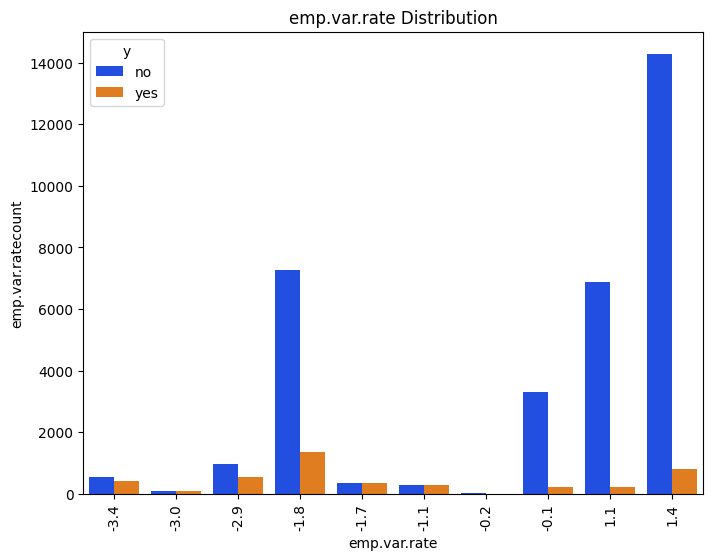

In [10]:
# Create a function to see the data distribution and hue as y
# Client information
# Social
# others
  
def plot_attribute(attribute):
    plt.subplots(figsize=(8,6))
    splot = sns.countplot(data=bank, x=attribute, hue = 'y', palette='bright')
    plt.xlabel(attribute)
    plt.xticks(rotation = 90)
    plt.ylabel(attribute+'count')
    plt.title(attribute + ' Distribution')
    plt.show()

# %%
# client attributes
plot_attribute('age')
plot_attribute('job')
plot_attribute('marital')
plot_attribute('education')
plot_attribute('default')
plot_attribute('housing')
plot_attribute('loan')

# %%
# Others attributes
plot_attribute('poutcome')

# %%
# Others attributes
plot_attribute('emp.var.rate')


In [5]:
# Followin are the attributes which are non-numeric    
# job   marital    education default housing loan  contact   month day_of_week  poutcome        
# we can use label encoders to encode

label_encoders = {}
for column in bank.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    bank[column] = label_encoders[column].fit_transform(bank[column])

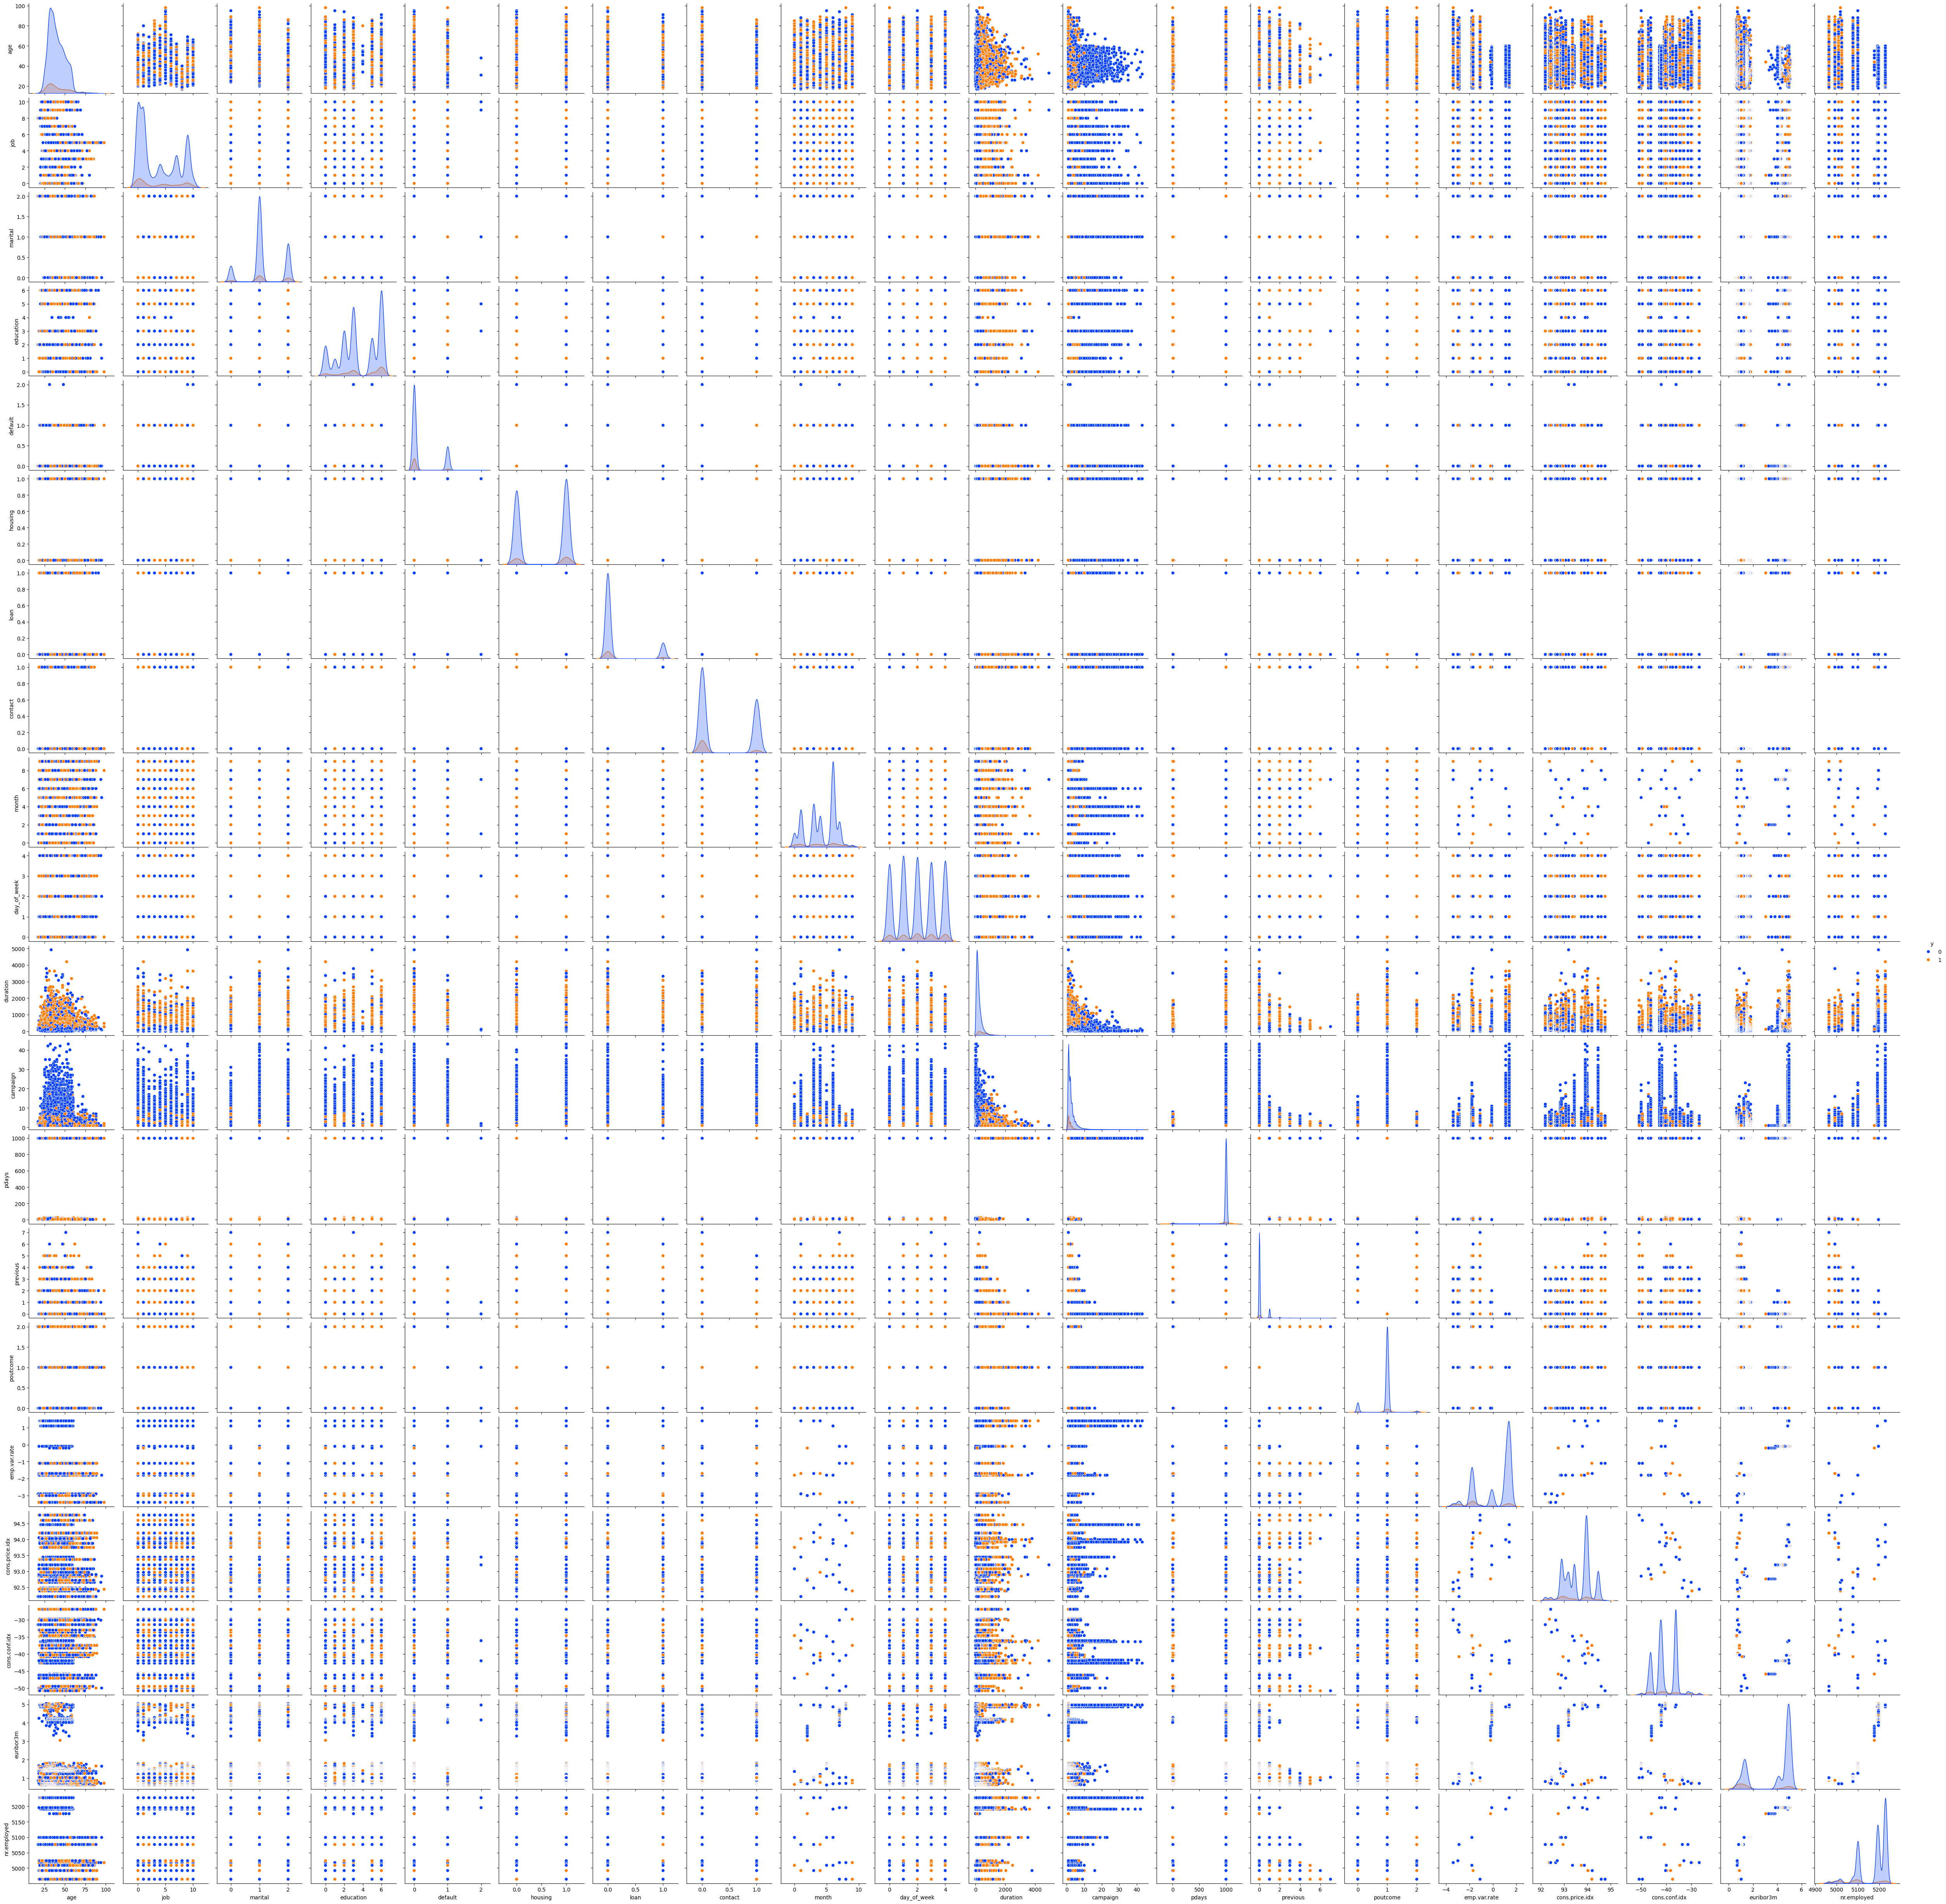

In [12]:
# Pairplot
sns.pairplot(bank, hue='y', palette='bright')
plt.show()

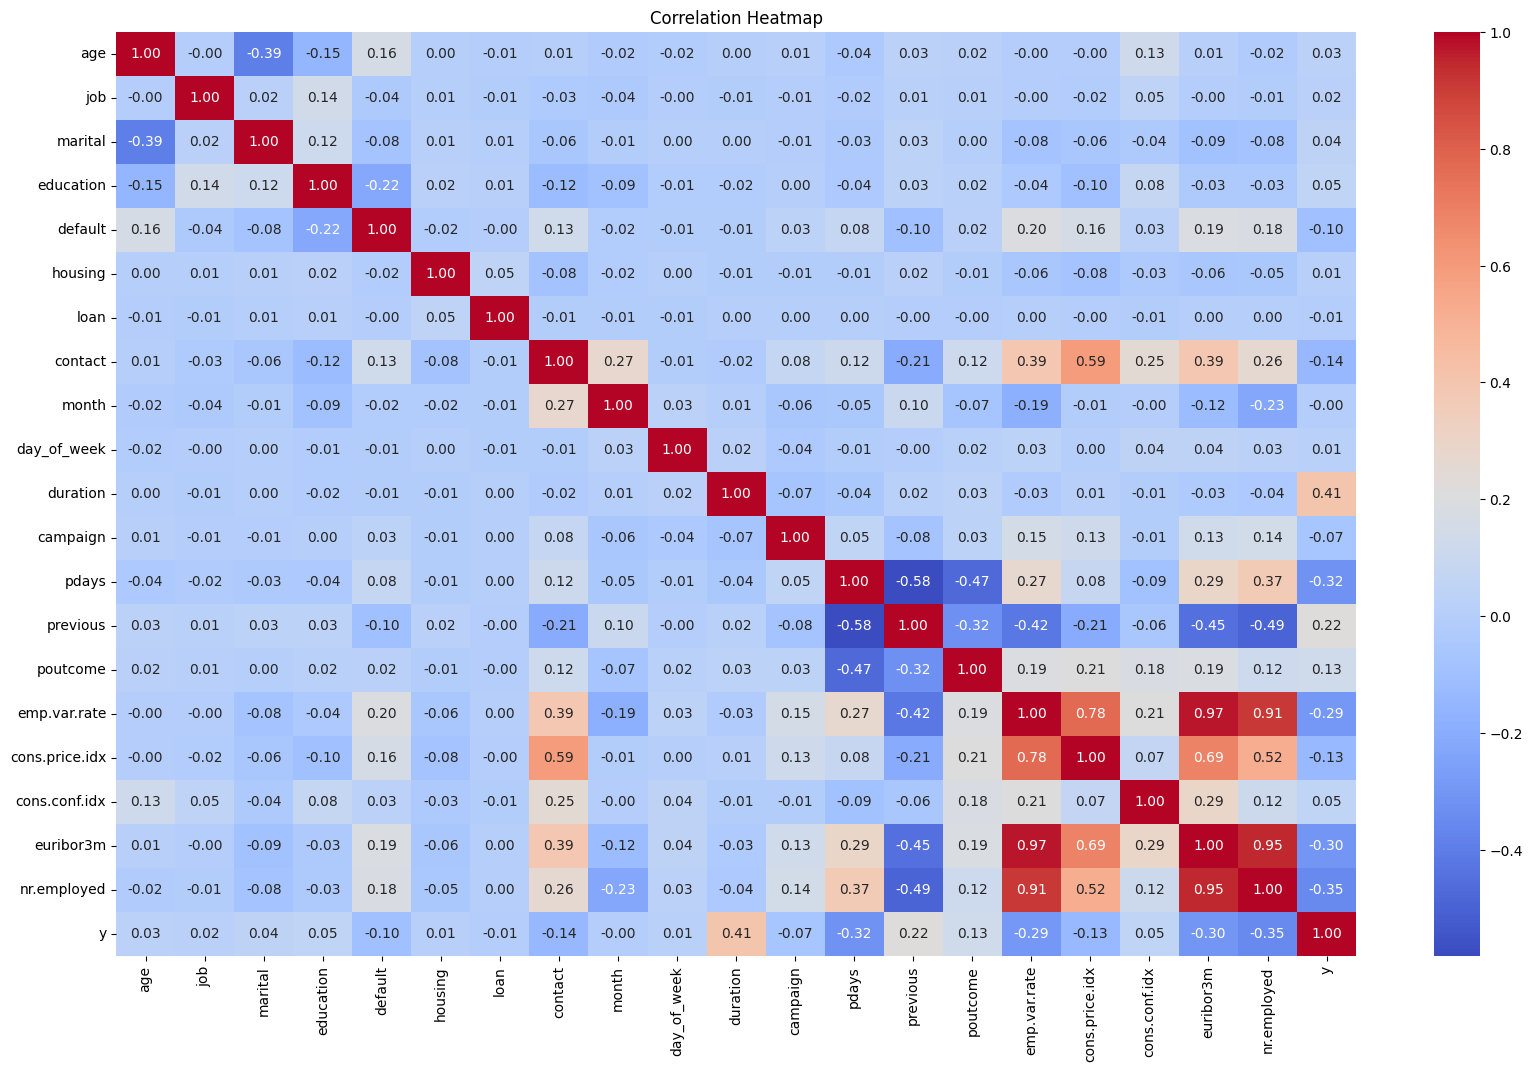

In [13]:
# Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(bank.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# From below correlation we can see
# emp.var.rate , nr.employed, cons.price.idx are strongly correlated

       variable         VIF  Tolerance
0     Intercept  384.039879   0.002604
1           age    1.227866   0.814421
2           job    1.020535   0.979878
3       marital    1.200814   0.832769
4     education    1.107861   0.902640
5       default    1.111841   0.899409
6       housing    1.010100   0.990001
7          loan    1.002616   0.997391
8       contact    1.389272   0.719801
9         month    1.183964   0.844620
10  day_of_week    1.007878   0.992184
11     duration    1.008609   0.991464
12     campaign    1.029961   0.970911
13        pdays    6.055197   0.165147
14     previous    5.135277   0.194731
15     poutcome    4.499134   0.222265
16    euribor3m    1.570259   0.636838


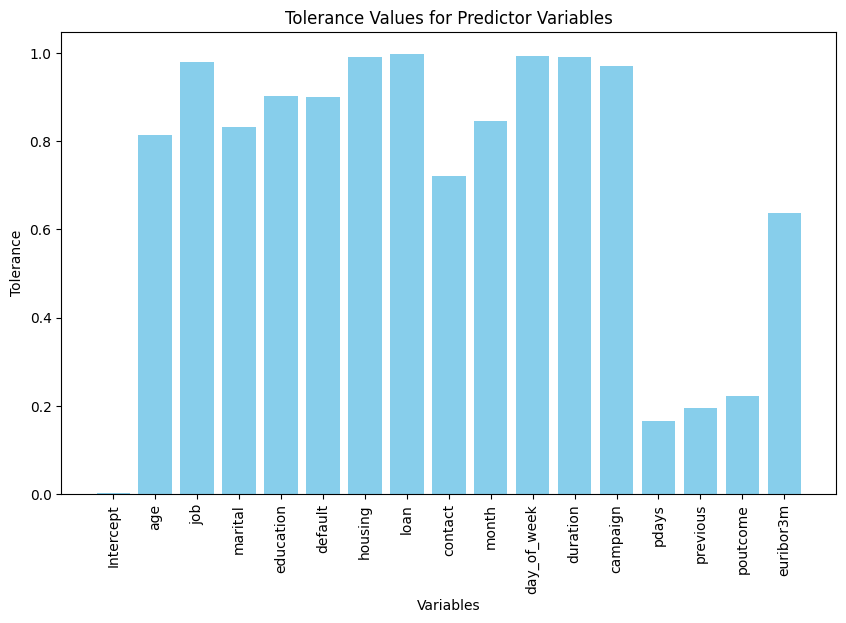

In [6]:
# Define the response variable and predictor variables
y, X = dmatrices('y ~ age + job + marital + education + default + housing + loan + contact + month + day_of_week + duration + campaign + pdays + previous + poutcome + euribor3m', data=bank, return_type='dataframe')

# Calculate VIF for each predictor variable
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Calculate Tolerance (reciprocal of VIF)
vif_df['Tolerance'] = 1 / vif_df['VIF']

print(vif_df)

# Plot Tolerance values
plt.figure(figsize=(10, 6))
plt.bar(vif_df['variable'], vif_df['Tolerance'], color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Tolerance')
plt.title('Tolerance Values for Predictor Variables')
plt.xticks(rotation=90)
plt.show()


### As we can see only pdays and previous has high collinearity
### We can remove pdays and previous 
### duration: As per additional-names.txt this should be also dropped 

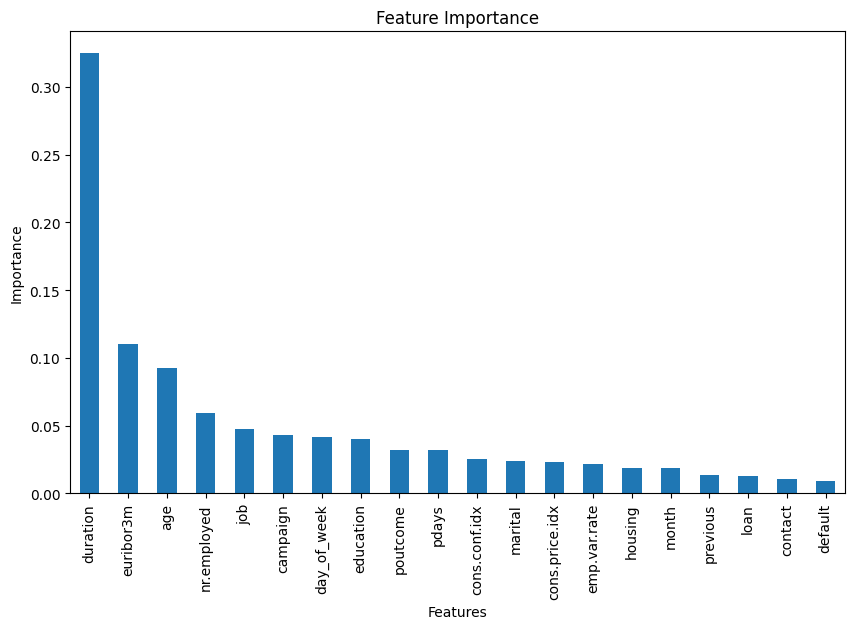

In [7]:
# check the feature importance 
# Separate features and target variable
X = bank.drop('y', axis=1)
y = bank['y']

# Train a RandomForestClassifier to determine feature importance
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [8]:
# Split the data into features and target variable
# we will build our basic model only using Bank Client information
X = bank.iloc[:,0:7]
y = bank['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets (80-20 split)
# we will build our basic model only using Bank Client information

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### I have used DummyClassifier and accuracy as baseline and we can set baseline accuracy to 0.887 

### I have also used RandonForestClassifier to get the important features  

In [9]:
# Create a dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = dummy_clf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred)

print(f"Baseline Accuracy: {baseline_accuracy}")

Baseline Accuracy: 0.8879592103542947


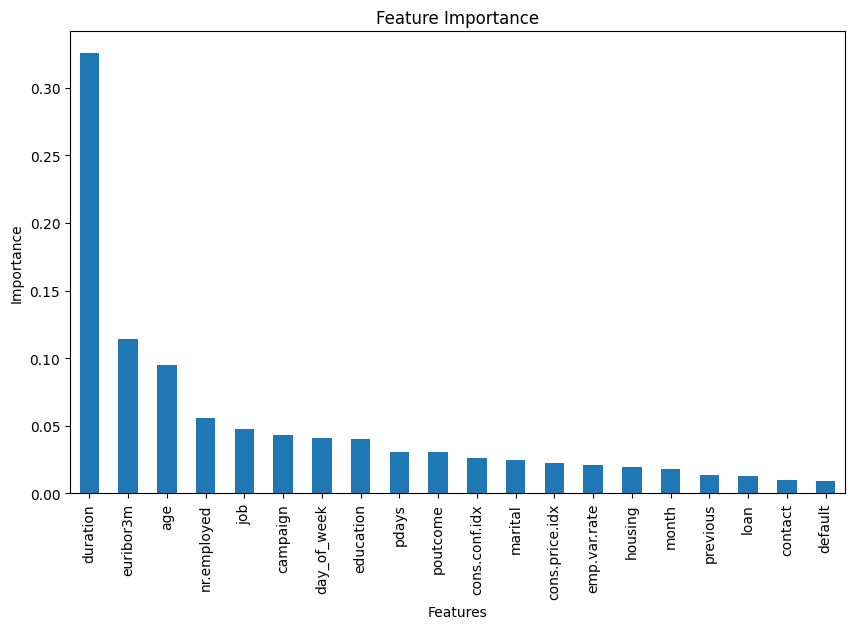

In [10]:
# check the feature importance 
# Separate features and target variable
X = bank.drop('y', axis=1)
y = bank['y']

# Train a RandomForestClassifier to determine feature importance
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [11]:
# model executor
# it uses X_train, y_train and X_test, y_test sets automatically!
def model_executor(model, cv, params, metric):
    model_grid = GridSearchCV(model, cv = cv, param_grid = params,
                              scoring=metric).fit(X_train, y_train)
    model_train = model_grid.score(X_train, y_train)
    model_test = model_grid.score(X_test, y_test)
    model_time = np.mean(model_grid.cv_results_['mean_fit_time'])
    model_params = model_grid.best_params_
    model_results = model_grid.cv_results_

    # results
    print(f'Training Accuracy: {model_train: .5f}')
    print(f'Test Accuracy    : {model_test: .5f}')
    print(f'Average Fit Time : {model_time: .5f}')
    print(f'Best parameters @ {metric} of {model}: {model_params}')

    
    return model_grid, model_train, model_test, model_time, model_params, model_results


### Problem 9: Score the Model

What is the accuracy of your model?

In [12]:
metric = 'accuracy'
cv=5
params = {'C':[1]}
lgr = LogisticRegression(max_iter=100)
lgr_grid, lgr_train, lgr_test, lgr_time, lgr_params, lgr_results = model_executor(lgr, cv, params, metric)

Training Accuracy:  0.88884
Test Accuracy    :  0.88796
Average Fit Time :  0.08924
Best parameters @ accuracy of LogisticRegression(): {'C': 1}


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|   Logistic Regression  | 0.079213  | 0.888842    | 0.887959    |
|  Decision Tree   | 0.033238 |   0.913518 |  0.868741    |
|   KNN  | 0.035098 | 0.892045 |  0.875409   |
|   SVM  |  3.058475 |    0.888842 |  0.887959    |




In [13]:
# Implement other models 

knn = KNeighborsClassifier()

dtr = DecisionTreeClassifier()

svc = SVC()

In [14]:
params = {'n_neighbors': [5], 'weights':['uniform']}
knn_grid, knn_train, knn_test, knn_time, knn_params, knn_results = model_executor(knn, cv, params, metric)


params = {'criterion': ['gini']}
dtr_grid, dtr_train, dtr_test, dtr_time, dtr_params, dtr_results = model_executor(dtr, cv, params, metric)


params = {'cache_size':[800]}
svc_grid, svc_train, svc_test, svc_time, svc_params, svc_results = model_executor(svc, cv, params, metric)

# %%
model_base = pd.DataFrame({'Model':['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
                          'Train Time':[lgr_time, knn_time, dtr_time, svc_time],
                          'Train Accuracy':[lgr_train, knn_train, dtr_train, svc_train],
                          'Test Accuracy':[lgr_test, knn_test, dtr_test, svc_test]
                         })
model_base

Training Accuracy:  0.89204
Test Accuracy    :  0.87541
Average Fit Time :  0.03593
Best parameters @ accuracy of KNeighborsClassifier(): {'n_neighbors': 5, 'weights': 'uniform'}
Training Accuracy:  0.91352
Test Accuracy    :  0.86848
Average Fit Time :  0.02734
Best parameters @ accuracy of DecisionTreeClassifier(): {'criterion': 'gini'}
Training Accuracy:  0.88884
Test Accuracy    :  0.88796
Average Fit Time :  3.06552
Best parameters @ accuracy of SVC(): {'cache_size': 800}


Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.089237        0.888842       0.887959
1                  KNN    0.035930        0.892045       0.875409
2        Decision Tree    0.027335        0.913518       0.868480
3                  SVM    3.065515        0.888842       0.887959

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric


### Model comparison post optimization
 
 
| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|   Logistic Regression  | 0.017821 | 0.911067 |  0.909923    |
|  Decision Tree   | 0.084933 |   1.000000 |  0.890835   |
|   KNN  | 0.003812 | 0.926330 |  0.902602   |
|   SVM  |  5.567892 |    0.920414 |  0.910446   |


In [15]:
# Add more columns from other categories

# Followin are the attributes which are non-numeric    
# job   marital    education default housing loan  contact   month day_of_week  poutcome        
# we can use label encoders to encode

label_encoders = {}
for column in bank.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    bank[column] = label_encoders[column].fit_transform(bank[column])



# Remove strongly correlated attributes emp.var.rate , nr.employed, cons.price.idx

columns_to_drop = ['cons.price.idx','emp.var.rate', 'y']
X = bank.drop(columns=columns_to_drop)
y = bank['y']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)


In [21]:
metric = 'accuracy'
cv=5
params = {'C':[1]}
lgr = LogisticRegression(max_iter=100)
lgr_grid, lgr_train, lgr_test, lgr_time, lgr_params, lgr_results = model_executor(lgr, cv, params, metric)

# %%
params = {'n_neighbors': [5], 'weights':['uniform']}
knn_grid, knn_train, knn_test, knn_time, knn_params, knn_results = model_executor(knn, cv, params, metric)

# %%
params = {'criterion': ['gini']}
dtr_grid, dtr_train, dtr_test, dtr_time, dtr_params, dtr_results = model_executor(dtr, cv, params, metric)

# %%
params = {'cache_size':[800]}
svc_grid, svc_train, svc_test, svc_time, svc_params, svc_results = model_executor(svc, cv, params, metric)

# %%
model_optimized = pd.DataFrame({'Model':['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
                          'Train Time':[lgr_time, knn_time, dtr_time, svc_time],
                          'Train Accuracy':[lgr_train, knn_train, dtr_train, svc_train],
                          'Test Accuracy':[lgr_test, knn_test, dtr_test, svc_test]
                         })
model_optimized


Training Accuracy:  0.91107
Test Accuracy    :  0.90992
Average Fit Time :  0.02264
Best parameters @ accuracy of LogisticRegression(): {'C': 1}
Training Accuracy:  0.92633
Test Accuracy    :  0.90260
Average Fit Time :  0.00220
Best parameters @ accuracy of KNeighborsClassifier(): {'n_neighbors': 5, 'weights': 'uniform'}
Training Accuracy:  1.00000
Test Accuracy    :  0.88914
Average Fit Time :  0.08550
Best parameters @ accuracy of DecisionTreeClassifier(): {'criterion': 'gini'}
Training Accuracy:  0.92041
Test Accuracy    :  0.91045
Average Fit Time :  4.28589
Best parameters @ accuracy of SVC(): {'cache_size': 800}


Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.022638        0.911067       0.909923
1                  KNN    0.002198        0.926330       0.902602
2        Decision Tree    0.085504        1.000000       0.889136
3                  SVM    4.285890        0.920414       0.910446

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38245 entries, 0 to 38244
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            38245 non-null  int64  
 1   job            38245 non-null  int64  
 2   marital        38245 non-null  int64  
 3   education      38245 non-null  int64  
 4   default        38245 non-null  int64  
 5   housing        38245 non-null  int64  
 6   loan           38245 non-null  int64  
 7   contact        38245 non-null  int64  
 8   month          38245 non-null  int64  
 9   day_of_week    38245 non-null  int64  
 10  duration       38245 non-null  int64  
 11  campaign       38245 non-null  int64  
 12  pdays          38245 non-null  int64  
 13  previous       38245 non-null  int64  
 14  poutcome       38245 non-null  int64  
 15  cons.conf.idx  38245 non-null  float64
 16  euribor3m      38245 non-null  float64
 17  nr.employed    38245 non-null  float64
dtypes: flo

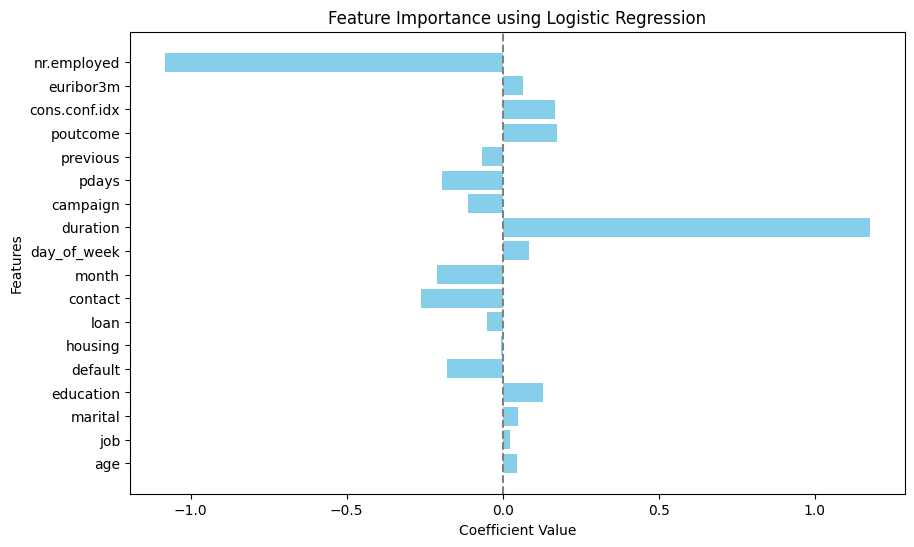

In [29]:
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train, y_train)
# Extract the coefficients (feature importances) 
coefficients = lgr.coef_[0] 
intercept = lgr.intercept_ 

feature_names = ['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','cons.conf.idx','euribor3m','nr.employed' ] # Replace with your actual feature names


# Feature names (optional, for better labeling) 
#features = [f'Feature {i+1}' for i in range(len(coefficients))]
# Plotting the coefficients 
plt.figure(figsize=(10, 6)) 
plt.barh(feature_names, coefficients, color='skyblue') 
plt.xlabel('Coefficient Value') 
plt.ylabel('Features') 
plt.title('Feature Importance using Logistic Regression') 
plt.axvline(0, color='grey', linestyle='--') 
plt.show()

##### Questions

#### We can use different optimization techniques to improve model perfromance more. 